In [1]:
from plyrda import f
from plyrda.verbs import mutate, filter
from plyrda.funcs import if_else
from plyrda.helpers import tibble

In [7]:
df = tibble(
    x=range(4),
    y=['zero', 'one', 'two', 'three']
)
print(df >> mutate(z=f.x))

   x      y  z
0  0   zero  0
1  1    one  1
2  2    two  2
3  3  three  3


In [8]:
print(df >> mutate(z=if_else(f.x>1, 1, 0)))

   x      y  z
0  0   zero  0
1  1    one  0
2  2    two  1
3  3  three  1


In [9]:
print(df >> filter(f.x>1))

   x      y
2  2    two
3  3  three


In [10]:
print(df >> mutate(z=if_else(f.x>1, 1, 0)) >> filter(f.z==1))

   x      y  z
2  2    two  1
3  3  three  1


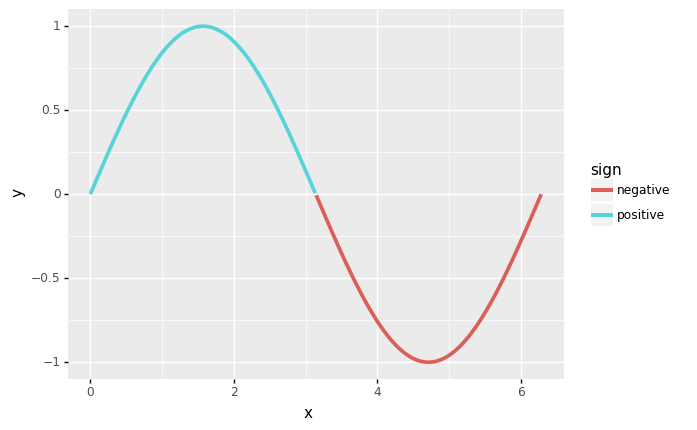

<ggplot: (8785051933265)>

In [6]:
# works with plotnine
import numpy
from pipda import register_verb, register_func
from plotnine import ggplot, aes, geom_line

sin = register_func(None, func=numpy.sin)

df = tibble(x=numpy.linspace(0, 2*numpy.pi, 500))
(
    df >> 
        mutate(y=sin(f.x), sign=if_else(f.y>=0, "positive", "negative")) >> 
        ggplot(aes(x='x', y='y'))
) + geom_line(aes(color='sign'), size=1.5)
